In [42]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras
from sklearn.utils import shuffle
import os

In [43]:
#Defining the greek alphabets to be detected by the model
class_names = ['Epsilon', 'Mu', 'Omega', 'Lambda', 
               'Nu', 'Psi']

In [44]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 

Loaded model from disk


In [45]:
folder = './test_images'
filenames = os.listdir(folder)
print(len(filenames))

60


In [46]:
test = []
test_labels = []
#filenames.remove('.DS_Store')
filenames = sorted(filenames)

#image data stored in array
test = np.array([np.array(Image.open('./test_images/' + im2).convert('L')).flatten()
              for im2 in filenames],'f')

#image labels created based on index of sortedfiles
test_labels = np.ones((len(filenames),),dtype = int)
test_labels[0:10] = 0
test_labels[10:20] = 1
test_labels[20:30] = 2
test_labels[30:40] = 3
test_labels[40:50] = 4
test_labels[50:60] = 5

#shuffle data before predicting
test, test_labels = shuffle(test, test_labels, random_state = 4)

In [47]:
#reshaping and normalizing the data
test = test.reshape(test.shape[0],28, 28, 1)
test = test.astype('float32')
test /= 255

In [48]:
# Use model to evaluate data
loaded_model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.train.GradientDescentOptimizer(0.01), metrics=['accuracy'])
test_loss, test_acc = loaded_model.evaluate(test, test_labels, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.9666666666666667


In [49]:
predictions = loaded_model.predict(test)

In [50]:
# function to plot the image
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img.reshape(28,28), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


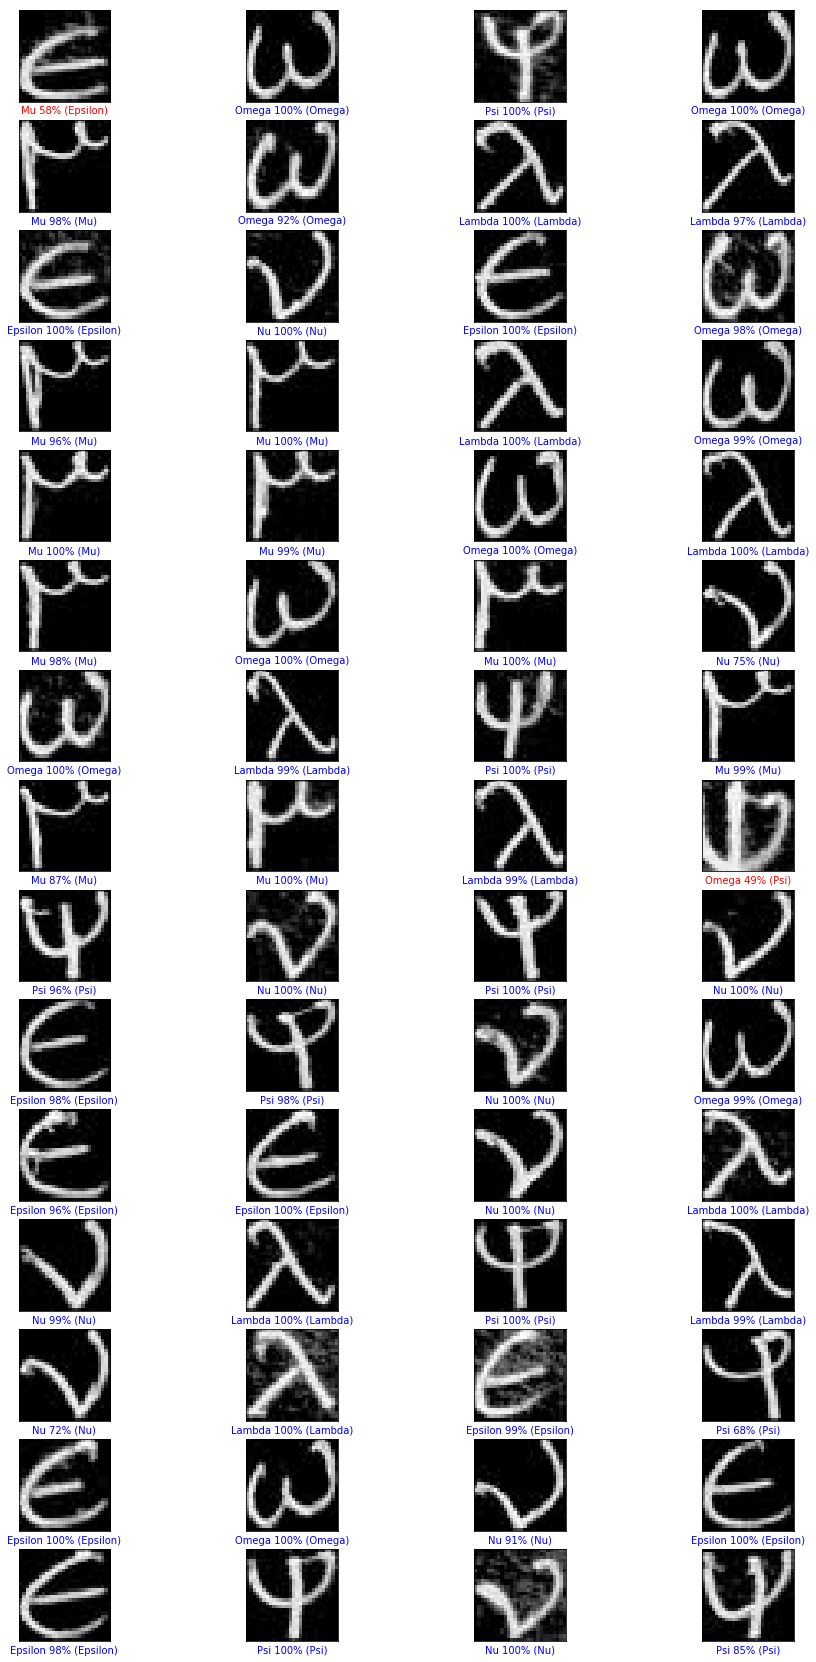

In [51]:
# Plots the images in a 15x4 grid with the predicted and true results
num_rows = 15
num_cols = 4
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i,pred in enumerate(predictions):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test)
    